In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score

# Load the Titanic dataset
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
data = pd.read_csv(url)

# Preprocess the data
def preprocess_data(df):
    # Drop unnecessary columns
    df = df.drop(['Name', 'Ticket', 'Cabin'], axis=1)
    
    # Fill missing values using safer method (fixing FutureWarning)
    df.loc[:, 'Age'] = df['Age'].fillna(df['Age'].median())
    df.loc[:, 'Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
    df.loc[:, 'Fare'] = df['Fare'].fillna(df['Fare'].median())

    # Encode categorical variables
    df.loc[:, 'Sex'] = LabelEncoder().fit_transform(df['Sex'])
    df = pd.get_dummies(df, columns=['Embarked'])  # One-hot encode 'Embarked'
    
    return df

data = preprocess_data(data)

# Split dataset into features (X) and target (y)
X = data.drop('Survived', axis=1)
y = data['Survived']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the MLP model (Fixing Keras Warning)
def create_mlp_model(input_dim):
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(input_dim,)),  # Proper input layer
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    return model

# Define optimizers
optimizers = {
    'SGD': tf.keras.optimizers.SGD(learning_rate=0.01),
    'Momentum': tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
    'Adam': tf.keras.optimizers.Adam(learning_rate=0.001),
    'RMSprop': tf.keras.optimizers.RMSprop(learning_rate=0.001)
}

# Define learning rate schedules
lr_schedules = {
    'StepDecay': tf.keras.optimizers.schedules.PiecewiseConstantDecay(
        boundaries=[1000, 2000], values=[0.01, 0.005, 0.001]),
    'ExponentialDecay': tf.keras.optimizers.schedules.ExponentialDecay(
        initial_learning_rate=0.01, decay_steps=1000, decay_rate=0.9, staircase=True),
    'PiecewiseConstantDecay': tf.keras.optimizers.schedules.PiecewiseConstantDecay(
        boundaries=[1000, 2000], values=[0.01, 0.005, 0.001]),
    'CosineDecay': tf.keras.optimizers.schedules.CosineDecay(
        initial_learning_rate=0.01, decay_steps=1000, alpha=0.1)
}

# Training parameters
batch_size = 32
epochs = 50

# Function to compile and train the model
def compile_and_train(model, optimizer, X_train, y_train, X_test, y_test):
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    
    # Train the model
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0, validation_data=(X_test, y_test))
    
    # Evaluate on test data
    final_loss, final_acc = model.evaluate(X_test, y_test, verbose=0)
    
    return final_acc, final_loss

# Train and evaluate models with different optimizers
results = {}

for name, opt in optimizers.items():
    print(f"Training with optimizer: {name}")
    model = create_mlp_model(X_train.shape[1])
    acc, loss = compile_and_train(model, opt, X_train, y_train, X_test, y_test)
    results[name] = (acc, loss)

# Train and evaluate models with different learning rate schedules
for name, schedule in lr_schedules.items():
    print(f"Training with learning rate schedule: {name}")
    model = create_mlp_model(X_train.shape[1])
    opt = tf.keras.optimizers.Adam(learning_rate=schedule)  # Using Adam with schedule
    acc, loss = compile_and_train(model, opt, X_train, y_train, X_test, y_test)
    results[name] = (acc, loss)

# Print results
print("\nFinal Results:")
for method, (acc, loss) in results.items():
    print(f"{method} - Final Validation Accuracy: {acc:.4f}, Final Validation Loss: {loss:.4f}")


Training with optimizer: SGD
Training with optimizer: Momentum
Training with optimizer: Adam
Training with optimizer: RMSprop
Training with learning rate schedule: StepDecay
Training with learning rate schedule: ExponentialDecay
Training with learning rate schedule: PiecewiseConstantDecay
Training with learning rate schedule: CosineDecay

Final Results:
SGD - Final Validation Accuracy: 0.8045, Final Validation Loss: 0.4102
Momentum - Final Validation Accuracy: 0.8156, Final Validation Loss: 0.4483
Adam - Final Validation Accuracy: 0.8436, Final Validation Loss: 0.4397
RMSprop - Final Validation Accuracy: 0.8268, Final Validation Loss: 0.4331
StepDecay - Final Validation Accuracy: 0.8324, Final Validation Loss: 0.8527
ExponentialDecay - Final Validation Accuracy: 0.8492, Final Validation Loss: 0.7010
PiecewiseConstantDecay - Final Validation Accuracy: 0.8212, Final Validation Loss: 0.7019
CosineDecay - Final Validation Accuracy: 0.8045, Final Validation Loss: 0.6512


In [4]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load Titanic dataset from local storage
file_path = "titanic.csv"  # Change this to your actual path
data = pd.read_csv(file_path)

# Preprocess the data
def preprocess_data(df):
    df = df.drop(['Name', 'Ticket', 'Cabin'], axis=1)  # Drop unnecessary columns
    
    # Fill missing values safely
    df.loc[:, 'Age'] = df['Age'].fillna(df['Age'].median())
    df.loc[:, 'Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
    df.loc[:, 'Fare'] = df['Fare'].fillna(df['Fare'].median())

    # Encode categorical variables
    df.loc[:, 'Sex'] = LabelEncoder().fit_transform(df['Sex'])
    df = pd.get_dummies(df, columns=['Embarked'])  # One-hot encode 'Embarked'
    
    return df

data = preprocess_data(data)

# Split dataset into features (X) and target (y)
X = data.drop('Survived', axis=1)
y = data['Survived']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define MLP model
def create_mlp_model(input_dim):
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(input_dim,)),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    return model

# Define optimizers
optimizers = {
    "Batch Gradient Descent (BGD)": tf.keras.optimizers.SGD(learning_rate=0.01),  # Full batch
    "Mini-Batch Gradient Descent (MBGD)": tf.keras.optimizers.SGD(learning_rate=0.01),  # Mini-batch (e.g., 32)
    "Stochastic Gradient Descent (SGD)": tf.keras.optimizers.SGD(learning_rate=0.01),  # Batch size = 1
    "SGD with Momentum": tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
    "NAG (Nesterov)": tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=True),
    "Adam": tf.keras.optimizers.Adam(learning_rate=0.001),
    "RMSprop": tf.keras.optimizers.RMSprop(learning_rate=0.001),
    "Adagrad": tf.keras.optimizers.Adagrad(learning_rate=0.01),
    "Adadelta": tf.keras.optimizers.Adadelta(learning_rate=1.0),
    "Nadam": tf.keras.optimizers.Nadam(learning_rate=0.001)
}

# Train and evaluate model
def compile_and_train(model, optimizer, X_train, y_train, X_test, y_test):
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0, validation_data=(X_test, y_test))
    final_loss, final_acc = model.evaluate(X_test, y_test, verbose=0)
    return final_acc, final_loss

# Training with different optimizers
results = {}
for name, opt in optimizers.items():
    print(f"Training with optimizer: {name}")
    model = create_mlp_model(X_train.shape[1])
    acc, loss = compile_and_train(model, opt, X_train, y_train, X_test, y_test)
    results[name] = (acc, loss)

# Print results
print("\nFinal Results:")
for method, (acc, loss) in results.items():
    print(f"{method} - Final Validation Accuracy: {acc:.4f}, Final Validation Loss: {loss:.4f}")


Training with optimizer: Batch Gradient Descent (BGD)
Training with optimizer: Mini-Batch Gradient Descent (MBGD)
Training with optimizer: Stochastic Gradient Descent (SGD)
Training with optimizer: SGD with Momentum
Training with optimizer: NAG (Nesterov)
Training with optimizer: Adam
Training with optimizer: RMSprop
Training with optimizer: Adagrad
Training with optimizer: Adadelta
Training with optimizer: Nadam

Final Results:
Batch Gradient Descent (BGD) - Final Validation Accuracy: 0.8045, Final Validation Loss: 0.4220
Mini-Batch Gradient Descent (MBGD) - Final Validation Accuracy: 0.8156, Final Validation Loss: 0.4150
Stochastic Gradient Descent (SGD) - Final Validation Accuracy: 0.8156, Final Validation Loss: 0.4103
SGD with Momentum - Final Validation Accuracy: 0.8101, Final Validation Loss: 0.4671
NAG (Nesterov) - Final Validation Accuracy: 0.8045, Final Validation Loss: 0.4399
Adam - Final Validation Accuracy: 0.8380, Final Validation Loss: 0.4317
RMSprop - Final Validation Ac

Training with optimizer: Batch Gradient Descent (BGD)
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step

Classification Report for Batch Gradient Descent (BGD):

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       105
           1       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179

Confusion Matrix for Batch Gradient Descent (BGD):



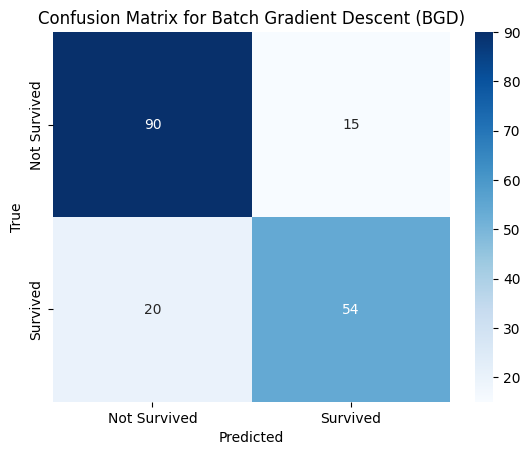

Training with optimizer: Mini-Batch Gradient Descent (MBGD)
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step

Classification Report for Mini-Batch Gradient Descent (MBGD):

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       105
           1       0.79      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179

Confusion Matrix for Mini-Batch Gradient Descent (MBGD):



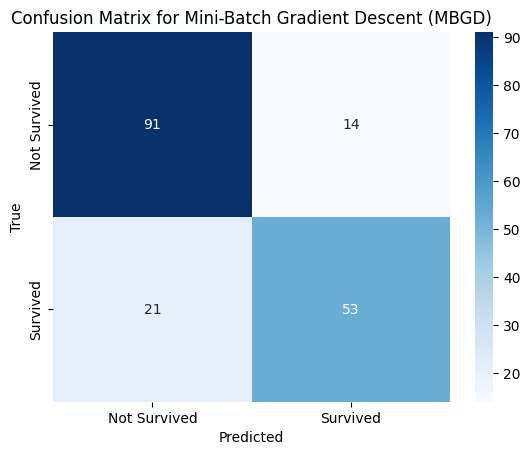

Training with optimizer: Stochastic Gradient Descent (SGD)
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step

Classification Report for Stochastic Gradient Descent (SGD):

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       105
           1       0.79      0.73      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

Confusion Matrix for Stochastic Gradient Descent (SGD):



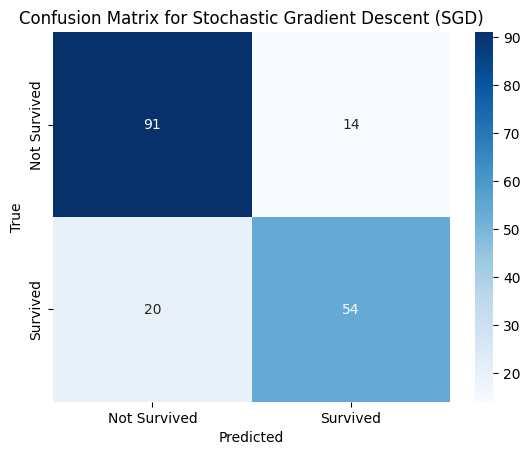

Training with optimizer: SGD with Momentum
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step

Classification Report for SGD with Momentum:

              precision    recall  f1-score   support

           0       0.80      0.93      0.86       105
           1       0.88      0.68      0.76        74

    accuracy                           0.83       179
   macro avg       0.84      0.80      0.81       179
weighted avg       0.83      0.83      0.82       179

Confusion Matrix for SGD with Momentum:



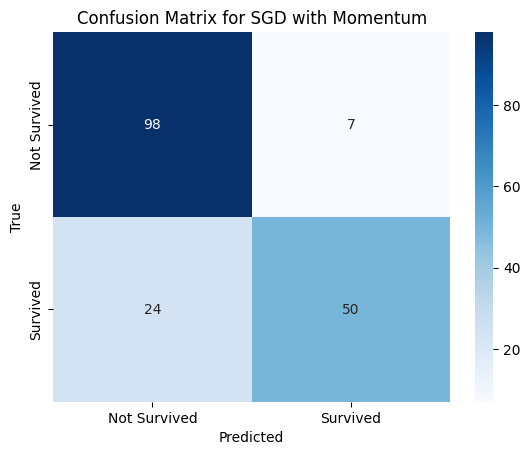

Training with optimizer: NAG (Nesterov)
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 

Classification Report for NAG (Nesterov):

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       105
           1       0.82      0.74      0.78        74

    accuracy                           0.83       179
   macro avg       0.83      0.81      0.82       179
weighted avg       0.83      0.83      0.83       179

Confusion Matrix for NAG (Nesterov):



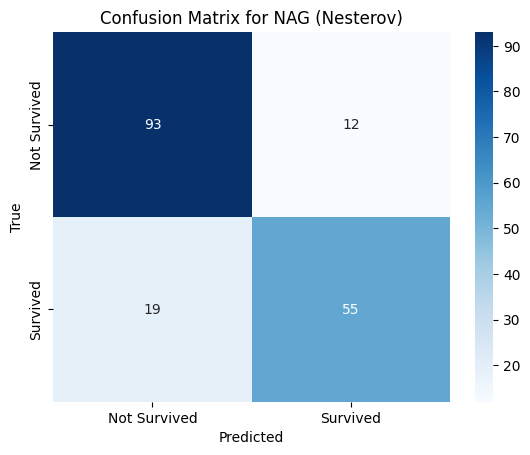

Training with optimizer: Adam
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 

Classification Report for Adam:

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       105
           1       0.80      0.70      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179

Confusion Matrix for Adam:



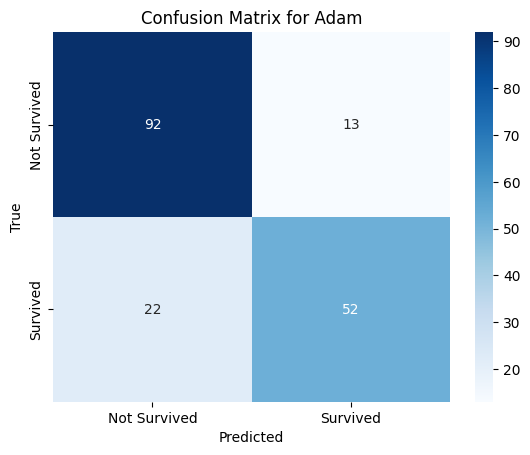

Training with optimizer: RMSprop
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 

Classification Report for RMSprop:

              precision    recall  f1-score   support

           0       0.81      0.90      0.85       105
           1       0.83      0.70      0.76        74

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.80       179
weighted avg       0.82      0.82      0.81       179

Confusion Matrix for RMSprop:



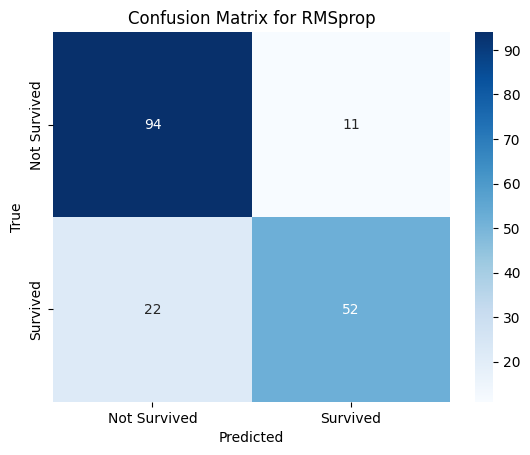

Training with optimizer: Adagrad
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step

Classification Report for Adagrad:

              precision    recall  f1-score   support

           0       0.81      0.90      0.86       105
           1       0.84      0.70      0.76        74

    accuracy                           0.82       179
   macro avg       0.83      0.80      0.81       179
weighted avg       0.82      0.82      0.82       179

Confusion Matrix for Adagrad:



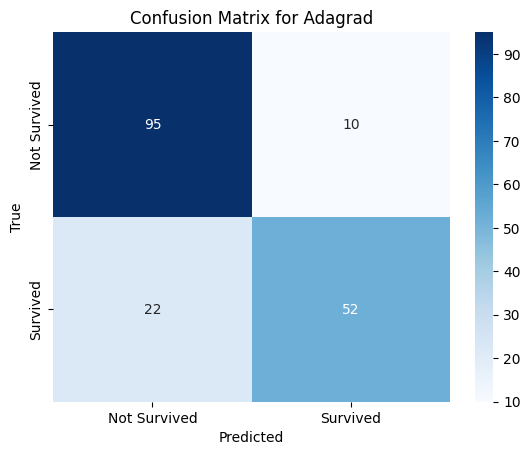

Training with optimizer: Adadelta
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step

Classification Report for Adadelta:

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       105
           1       0.80      0.70      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179

Confusion Matrix for Adadelta:



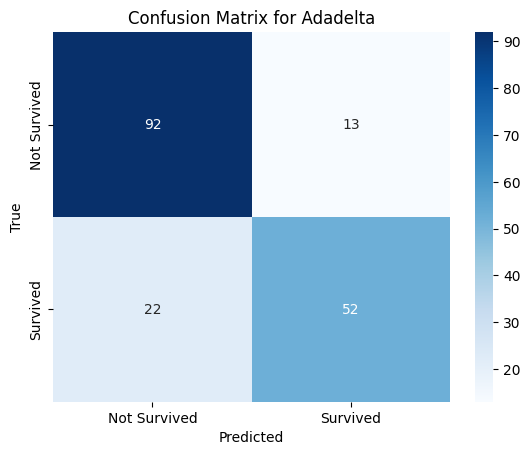

Training with optimizer: Nadam
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step

Classification Report for Nadam:

              precision    recall  f1-score   support

           0       0.83      0.88      0.85       105
           1       0.81      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179

Confusion Matrix for Nadam:



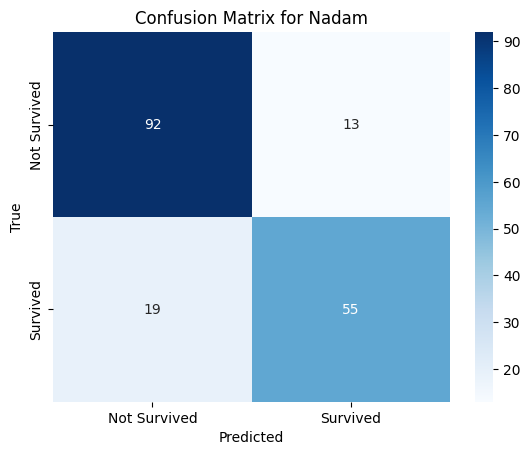


Final Results:
Batch Gradient Descent (BGD) - Final Validation Accuracy: 0.8045, Final Validation Loss: 0.4202
Mini-Batch Gradient Descent (MBGD) - Final Validation Accuracy: 0.8045, Final Validation Loss: 0.4101
Stochastic Gradient Descent (SGD) - Final Validation Accuracy: 0.8101, Final Validation Loss: 0.4184
SGD with Momentum - Final Validation Accuracy: 0.8268, Final Validation Loss: 0.4825
NAG (Nesterov) - Final Validation Accuracy: 0.8268, Final Validation Loss: 0.4334
Adam - Final Validation Accuracy: 0.8045, Final Validation Loss: 0.4429
RMSprop - Final Validation Accuracy: 0.8156, Final Validation Loss: 0.4428
Adagrad - Final Validation Accuracy: 0.8212, Final Validation Loss: 0.4181
Adadelta - Final Validation Accuracy: 0.8045, Final Validation Loss: 0.4371
Nadam - Final Validation Accuracy: 0.8212, Final Validation Loss: 0.4451


In [5]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load Titanic dataset from local storage
file_path = "titanic.csv"  # Change this to your actual path
data = pd.read_csv(file_path)

# Preprocess the data
def preprocess_data(df):
    df = df.drop(['Name', 'Ticket', 'Cabin'], axis=1)  # Drop unnecessary columns
    
    # Fill missing values safely
    df.loc[:, 'Age'] = df['Age'].fillna(df['Age'].median())
    df.loc[:, 'Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
    df.loc[:, 'Fare'] = df['Fare'].fillna(df['Fare'].median())

    # Encode categorical variables
    df.loc[:, 'Sex'] = LabelEncoder().fit_transform(df['Sex'])
    df = pd.get_dummies(df, columns=['Embarked'])  # One-hot encode 'Embarked'
    
    return df

data = preprocess_data(data)

# Split dataset into features (X) and target (y)
X = data.drop('Survived', axis=1)
y = data['Survived']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define MLP model
def create_mlp_model(input_dim):
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(input_dim,)),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    return model

# Define optimizers
optimizers = {
    "Batch Gradient Descent (BGD)": tf.keras.optimizers.SGD(learning_rate=0.01),  # Full batch
    "Mini-Batch Gradient Descent (MBGD)": tf.keras.optimizers.SGD(learning_rate=0.01),  # Mini-batch (e.g., 32)
    "Stochastic Gradient Descent (SGD)": tf.keras.optimizers.SGD(learning_rate=0.01),  # Batch size = 1
    "SGD with Momentum": tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
    "NAG (Nesterov)": tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=True),
    "Adam": tf.keras.optimizers.Adam(learning_rate=0.001),
    "RMSprop": tf.keras.optimizers.RMSprop(learning_rate=0.001),
    "Adagrad": tf.keras.optimizers.Adagrad(learning_rate=0.01),
    "Adadelta": tf.keras.optimizers.Adadelta(learning_rate=1.0),
    "Nadam": tf.keras.optimizers.Nadam(learning_rate=0.001)
}

# Train and evaluate model
def compile_and_train(model, optimizer, X_train, y_train, X_test, y_test):
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0, validation_data=(X_test, y_test))
    final_loss, final_acc = model.evaluate(X_test, y_test, verbose=0)
    return model, final_acc, final_loss

# Training with different optimizers and evaluation
results = {}
for name, opt in optimizers.items():
    print(f"Training with optimizer: {name}")
    model = create_mlp_model(X_train.shape[1])
    trained_model, acc, loss = compile_and_train(model, opt, X_train, y_train, X_test, y_test)
    y_pred = (trained_model.predict(X_test) > 0.5).astype("int32")  # Predicting class labels
    # Save results
    results[name] = (acc, loss, y_pred)

    # Print Classification Report and Confusion Matrix
    print(f"\nClassification Report for {name}:\n")
    print(classification_report(y_test, y_pred))
    
    print(f"Confusion Matrix for {name}:\n")
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Print final results summary
print("\nFinal Results:")
for method, (acc, loss, _) in results.items():
    print(f"{method} - Final Validation Accuracy: {acc:.4f}, Final Validation Loss: {loss:.4f}")


In [10]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import time

# Load Titanic dataset from local storage
file_path = "titanic.csv"  # Change this to your actual path
data = pd.read_csv(file_path)

# Preprocess the data
data = data.drop(['Name', 'Ticket', 'Cabin'], axis=1)  # Drop unnecessary columns
data.loc[:, 'Age'] = data['Age'].fillna(data['Age'].median())
data.loc[:, 'Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])
data.loc[:, 'Fare'] = data['Fare'].fillna(data['Fare'].median())

# Encode categorical variables
data.loc[:, 'Sex'] = LabelEncoder().fit_transform(data['Sex'])
data = pd.get_dummies(data, columns=['Embarked'])  # One-hot encode 'Embarked'

# Split dataset into features (X) and target (y)
X = data.drop('Survived', axis=1)
y = data['Survived']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define MLP model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Define optimizers
optimizers = {
    "Batch Gradient Descent (BGD)": tf.keras.optimizers.SGD(learning_rate=0.01),
    "Mini-Batch Gradient Descent (MBGD)": tf.keras.optimizers.SGD(learning_rate=0.01),
    "Stochastic Gradient Descent (SGD)": tf.keras.optimizers.SGD(learning_rate=0.01),
    "SGD with Momentum": tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
    "NAG (Nesterov)": tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=True),
    "Adam": tf.keras.optimizers.Adam(learning_rate=0.001),
    "RMSprop": tf.keras.optimizers.RMSprop(learning_rate=0.001),
    "Adagrad": tf.keras.optimizers.Adagrad(learning_rate=0.01),
    "Adadelta": tf.keras.optimizers.Adadelta(learning_rate=1.0),
    "Nadam": tf.keras.optimizers.Nadam(learning_rate=0.001)
}

# Custom callback to print classification report and execution time for a specific epoch
class EpochReportCallback(tf.keras.callbacks.Callback):
    def __init__(self, target_epoch, X_val, y_val):
        super(EpochReportCallback, self).__init__()
        self.target_epoch = target_epoch
        self.X_val = X_val
        self.y_val = y_val
    
    def on_epoch_end(self, epoch, logs=None):
        # Check if it's the target epoch (3rd epoch in this case)
        if epoch == self.target_epoch - 1:
            start_time = time.time()
            # Predict class labels for the validation set
            y_pred = (self.model.predict(self.X_val) > 0.5).astype("int32")
            end_time = time.time()
            
            # Print classification report for the target epoch
            print(f"\nEpoch {self.target_epoch} Classification Report:")
            print(classification_report(self.y_val, y_pred))
            
            # Print time taken for this epoch
            print(f"Time taken for Epoch {self.target_epoch}: {end_time - start_time:.2f} seconds")

# Train and evaluate model for different optimizers
results = {}
for name, opt in optimizers.items():
    print(f"Training with optimizer: {name}")
    
    # Compile model with current optimizer
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    
    # Create a custom callback for the 3rd epoch, passing validation data explicitly
    epoch_report_callback = EpochReportCallback(target_epoch=3, X_val=X_test, y_val=y_test)
    
    # Fit the model with validation data provided
    history = model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0, validation_data=(X_test, y_test),
                        callbacks=[epoch_report_callback])
    
    # Evaluate final performance on the test set
    final_loss, final_acc = model.evaluate(X_test, y_test, verbose=0)
    results[name] = (final_acc, final_loss)

# Print final results summary
print("\nFinal Results:")
for method, (acc, loss) in results.items():
    print(f"{method} - Final Validation Accuracy: {acc:.4f}, Final Validation Loss: {loss:.4f}")


Training with optimizer: Batch Gradient Descent (BGD)
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step

Epoch 3 Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.98      0.77       105
           1       0.88      0.20      0.33        74

    accuracy                           0.66       179
   macro avg       0.76      0.59      0.55       179
weighted avg       0.74      0.66      0.59       179

Time taken for Epoch 3: 0.17 seconds
Training with optimizer: Mini-Batch Gradient Descent (MBGD)
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 

Epoch 3 Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.96      0.82       105
           1       0.89      0.45      0.59        74

    accuracy                           0.75       179
   macro avg       0.80      0.70      0.71       179
weighted avg       0.79      0.75      0.73       179

Time taken for Epoch 3: 0.18 seconds
Training with opti

Training with optimizer: Batch Gradient Descent (BGD)
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 

Epoch 3 Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.96      0.74       105
           1       0.67      0.11      0.19        74

    accuracy                           0.61       179
   macro avg       0.64      0.54      0.46       179
weighted avg       0.63      0.61      0.51       179

Time taken for Epoch 3: 0.17 seconds
Training with optimizer: Mini-Batch Gradient Descent (MBGD)
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step

Epoch 3 Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.94      0.81       105
           1       0.85      0.46      0.60        74

    accuracy                           0.74       179
   macro avg       0.78      0.70      0.70       179
weighted avg       0.77      0.74      0.72       179

Time taken for Epoch 3: 0.21 seconds
Training with opti

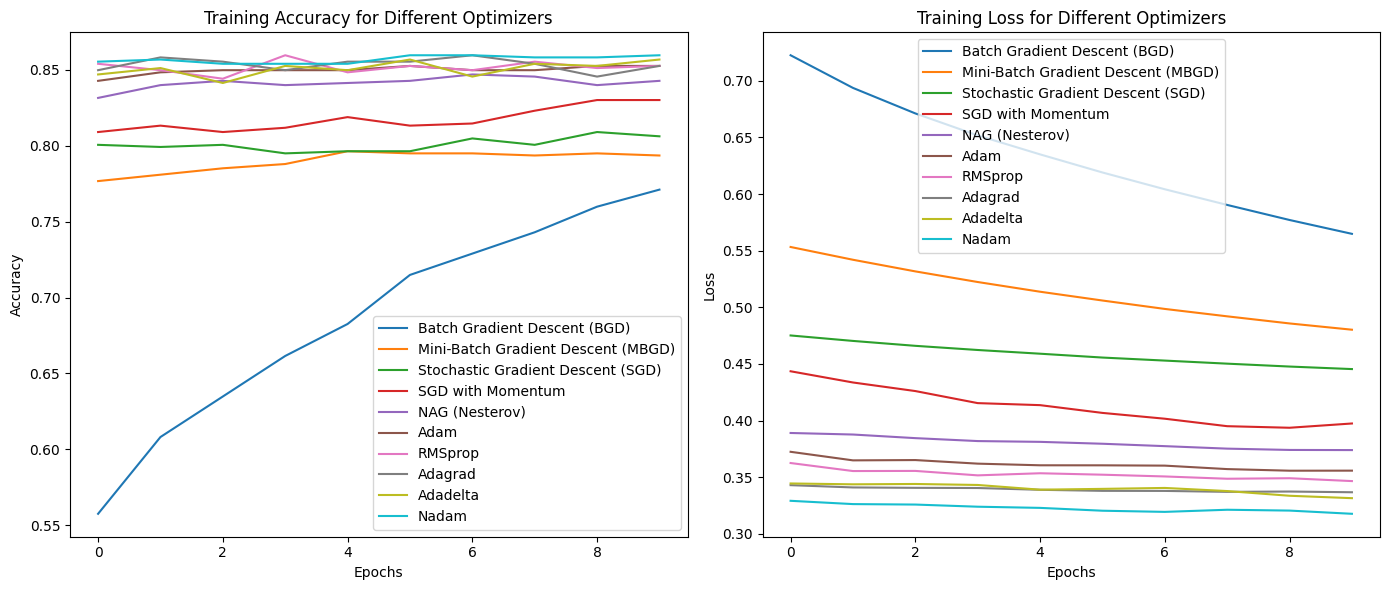


Final Results:
Batch Gradient Descent (BGD) - Final Validation Accuracy: 0.7095, Final Validation Loss: 0.5534
Mini-Batch Gradient Descent (MBGD) - Final Validation Accuracy: 0.7989, Final Validation Loss: 0.4783
Stochastic Gradient Descent (SGD) - Final Validation Accuracy: 0.8101, Final Validation Loss: 0.4418
SGD with Momentum - Final Validation Accuracy: 0.8045, Final Validation Loss: 0.4256
NAG (Nesterov) - Final Validation Accuracy: 0.8156, Final Validation Loss: 0.4348
Adam - Final Validation Accuracy: 0.8156, Final Validation Loss: 0.4342
RMSprop - Final Validation Accuracy: 0.8268, Final Validation Loss: 0.4429
Adagrad - Final Validation Accuracy: 0.8212, Final Validation Loss: 0.4441
Adadelta - Final Validation Accuracy: 0.8156, Final Validation Loss: 0.4535
Nadam - Final Validation Accuracy: 0.8045, Final Validation Loss: 0.4507


In [11]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import time
import matplotlib.pyplot as plt

# Load Titanic dataset from local storage
file_path = "titanic.csv"  # Change this to your actual path
data = pd.read_csv(file_path)

# Preprocess the data
data = data.drop(['Name', 'Ticket', 'Cabin'], axis=1)  # Drop unnecessary columns
data.loc[:, 'Age'] = data['Age'].fillna(data['Age'].median())
data.loc[:, 'Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])
data.loc[:, 'Fare'] = data['Fare'].fillna(data['Fare'].median())

# Encode categorical variables
data.loc[:, 'Sex'] = LabelEncoder().fit_transform(data['Sex'])
data = pd.get_dummies(data, columns=['Embarked'])  # One-hot encode 'Embarked'

# Split dataset into features (X) and target (y)
X = data.drop('Survived', axis=1)
y = data['Survived']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define MLP model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Define optimizers
optimizers = {
    "Batch Gradient Descent (BGD)": tf.keras.optimizers.SGD(learning_rate=0.01),
    "Mini-Batch Gradient Descent (MBGD)": tf.keras.optimizers.SGD(learning_rate=0.01),
    "Stochastic Gradient Descent (SGD)": tf.keras.optimizers.SGD(learning_rate=0.01),
    "SGD with Momentum": tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
    "NAG (Nesterov)": tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=True),
    "Adam": tf.keras.optimizers.Adam(learning_rate=0.001),
    "RMSprop": tf.keras.optimizers.RMSprop(learning_rate=0.001),
    "Adagrad": tf.keras.optimizers.Adagrad(learning_rate=0.01),
    "Adadelta": tf.keras.optimizers.Adadelta(learning_rate=1.0),
    "Nadam": tf.keras.optimizers.Nadam(learning_rate=0.001)
}

# Custom callback to print classification report and execution time for a specific epoch
class EpochReportCallback(tf.keras.callbacks.Callback):
    def __init__(self, target_epoch, X_val, y_val):
        super(EpochReportCallback, self).__init__()
        self.target_epoch = target_epoch
        self.X_val = X_val
        self.y_val = y_val
    
    def on_epoch_end(self, epoch, logs=None):
        # Check if it's the target epoch (3rd epoch in this case)
        if epoch == self.target_epoch - 1:
            start_time = time.time()
            # Predict class labels for the validation set
            y_pred = (self.model.predict(self.X_val) > 0.5).astype("int32")
            end_time = time.time()
            
            # Print classification report for the target epoch
            print(f"\nEpoch {self.target_epoch} Classification Report:")
            print(classification_report(self.y_val, y_pred))
            
            # Print time taken for this epoch
            print(f"Time taken for Epoch {self.target_epoch}: {end_time - start_time:.2f} seconds")

# Variables to store accuracy and loss for all optimizers
all_acc = {}
all_loss = {}

# Train and evaluate model for different optimizers
for name, opt in optimizers.items():
    print(f"Training with optimizer: {name}")
    
    # Compile model with current optimizer
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    
    # Create a custom callback for the 3rd epoch, passing validation data explicitly
    epoch_report_callback = EpochReportCallback(target_epoch=3, X_val=X_test, y_val=y_test)
    
    # Fit the model with validation data provided and collect training history
    history = model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0, validation_data=(X_test, y_test),
                        callbacks=[epoch_report_callback])
    
    # Store accuracy and loss for each optimizer
    all_acc[name] = history.history['accuracy']
    all_loss[name] = history.history['loss']

# Plot loss and accuracy for all optimizers
plt.figure(figsize=(14, 6))

# Plot Accuracy
plt.subplot(1, 2, 1)
for name, acc in all_acc.items():
    plt.plot(acc, label=name)
plt.title('Training Accuracy for Different Optimizers')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
for name, loss in all_loss.items():
    plt.plot(loss, label=name)
plt.title('Training Loss for Different Optimizers')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()

# Print final results summary
print("\nFinal Results:")
for method, (acc, loss) in results.items():
    print(f"{method} - Final Validation Accuracy: {acc:.4f}, Final Validation Loss: {loss:.4f}")


Training with optimizer: Batch Gradient Descent (BGD)
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step

Epoch 3 Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.89      0.81       105
           1       0.78      0.58      0.67        74

    accuracy                           0.76       179
   macro avg       0.77      0.73      0.74       179
weighted avg       0.76      0.76      0.75       179

Time taken for Epoch 3: 0.28 seconds
Training with optimizer: Mini-Batch Gradient Descent (MBGD)
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step

Epoch 3 Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.88      0.76       105
           1       0.70      0.41      0.51        74

    accuracy                           0.68       179
   macro avg       0.69      0.64      0.64       179
weighted avg       0.69      0.68      0.66       179

Time taken for Epoch 3: 0.28 seconds
Training with opti

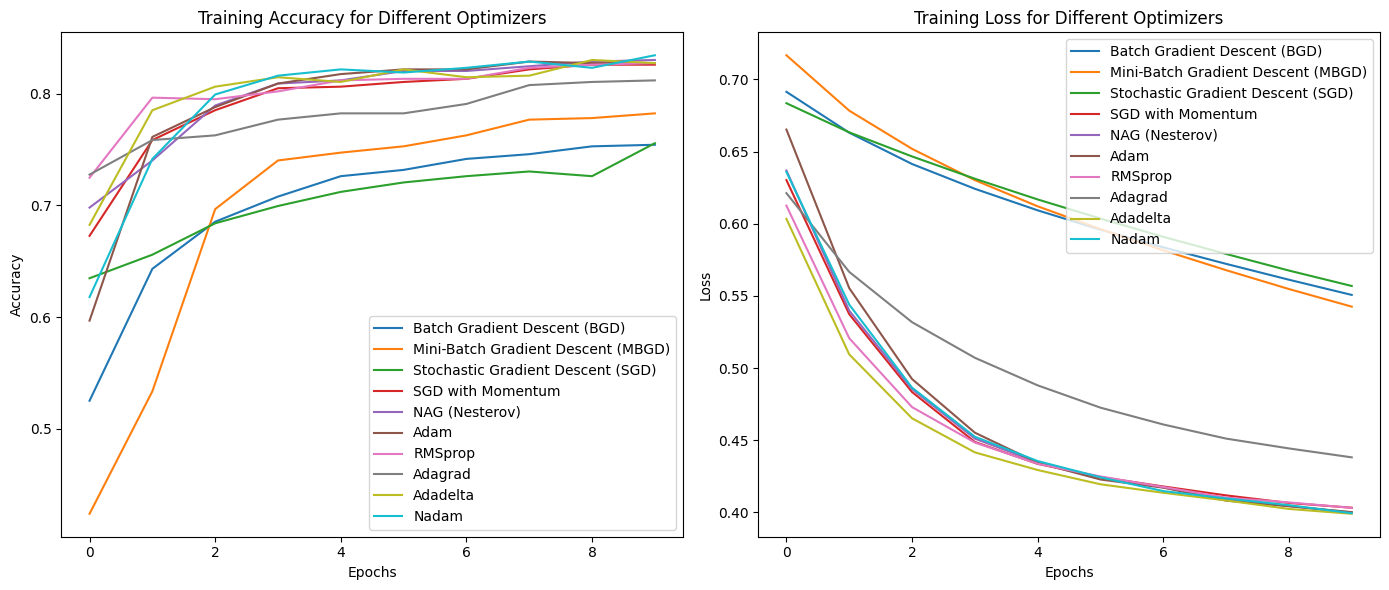


Final Results:
Batch Gradient Descent (BGD) - Final Validation Accuracy: 0.7542, Final Validation Loss: 0.5507
Mini-Batch Gradient Descent (MBGD) - Final Validation Accuracy: 0.7823, Final Validation Loss: 0.5426
Stochastic Gradient Descent (SGD) - Final Validation Accuracy: 0.7556, Final Validation Loss: 0.5569
SGD with Momentum - Final Validation Accuracy: 0.8258, Final Validation Loss: 0.4032
NAG (Nesterov) - Final Validation Accuracy: 0.8301, Final Validation Loss: 0.3999
Adam - Final Validation Accuracy: 0.8272, Final Validation Loss: 0.4002
RMSprop - Final Validation Accuracy: 0.8272, Final Validation Loss: 0.4032
Adagrad - Final Validation Accuracy: 0.8118, Final Validation Loss: 0.4381
Adadelta - Final Validation Accuracy: 0.8272, Final Validation Loss: 0.3990
Nadam - Final Validation Accuracy: 0.8343, Final Validation Loss: 0.3994


In [4]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report
import time
import matplotlib.pyplot as plt

# Load Titanic dataset from local storage
file_path = "titanic.csv"  # Change this to your actual path
data = pd.read_csv(file_path)

# Preprocess the data
data = data.drop(['Name', 'Ticket', 'Cabin'], axis=1)  # Drop unnecessary columns
data.loc[:, 'Age'] = data['Age'].fillna(data['Age'].median())
data.loc[:, 'Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])
data.loc[:, 'Fare'] = data['Fare'].fillna(data['Fare'].median())

# Encode categorical variables
data.loc[:, 'Sex'] = LabelEncoder().fit_transform(data['Sex'])
data = pd.get_dummies(data, columns=['Embarked'])  # One-hot encode 'Embarked'

# Split dataset into features (X) and target (y)
X = data.drop('Survived', axis=1)
y = data['Survived']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define optimizers
optimizers = {
    "Batch Gradient Descent (BGD)": tf.keras.optimizers.SGD(learning_rate=0.01),
    "Mini-Batch Gradient Descent (MBGD)": tf.keras.optimizers.SGD(learning_rate=0.01),
    "Stochastic Gradient Descent (SGD)": tf.keras.optimizers.SGD(learning_rate=0.01),
    "SGD with Momentum": tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
    "NAG (Nesterov)": tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=True),
    "Adam": tf.keras.optimizers.Adam(learning_rate=0.001),
    "RMSprop": tf.keras.optimizers.RMSprop(learning_rate=0.001),
    "Adagrad": tf.keras.optimizers.Adagrad(learning_rate=0.01),
    "Adadelta": tf.keras.optimizers.Adadelta(learning_rate=1.0),
    "Nadam": tf.keras.optimizers.Nadam(learning_rate=0.001)
}

# Custom callback to print classification report and execution time for a specific epoch
class EpochReport(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if epoch == 2:  # Targeting the 3rd epoch (0-based index)
            start_time = time.time()
            y_pred = (self.model.predict(X_test) > 0.5).astype(int)
            elapsed_time = time.time() - start_time
            print(f"\nEpoch 3 - Classification Report:\n{classification_report(y_test, y_pred)}")
            print(f"Time taken: {elapsed_time:.2f} seconds")

# Variables to store accuracy and loss for all optimizers
all_acc = {}
all_loss = {}

# Train and evaluate model for different optimizers
for name, opt in optimizers.items():
    print(f"Training with optimizer: {name}")

    # Define model directly in the loop
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(X_train.shape[1],)),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    # Compile model with current optimizer
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

    # Create a custom callback for the 3rd epoch
    epoch_report_callback = EpochReportCallback(target_epoch=3, X_val=X_test, y_val=y_test)

    # Train the model
    history = model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0,
                        validation_data=(X_test, y_test), callbacks=[epoch_report_callback])

    # Store accuracy and loss for each optimizer
    all_acc[name] = history.history['accuracy']
    all_loss[name] = history.history['loss']

# Plot loss and accuracy for all optimizers
plt.figure(figsize=(14, 6))

# Plot Accuracy
plt.subplot(1, 2, 1)
for name, acc in all_acc.items():
    plt.plot(acc, label=name)
plt.title('Training Accuracy for Different Optimizers')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
for name, loss in all_loss.items():
    plt.plot(loss, label=name)
plt.title('Training Loss for Different Optimizers')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()
 
# Print final results summary
print("\nFinal Results:")
for method in optimizers.keys():
    print(f"{method} - Final Validation Accuracy: {all_acc[method][-1]:.4f}, Final Validation Loss: {all_loss[method][-1]:.4f}")


In [5]:
#without a specific time


Training with optimizer: Batch Gradient Descent (BGD)
Epoch 1/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.4114 - loss: 0.7110 - val_accuracy: 0.3916 - val_loss: 0.7061
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4446 - loss: 0.6954 - val_accuracy: 0.5594 - val_loss: 0.6814
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5602 - loss: 0.6760 - val_accuracy: 0.6713 - val_loss: 0.6622
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6748 - loss: 0.6596 - val_accuracy: 0.7343 - val_loss: 0.6466
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7485 - loss: 0.6440 - val_accuracy: 0.7483 - val_loss: 0.6329
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7312 - loss: 0.6353 - val_accuracy: 0.7622 - val_loss: 0.6204
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7460 - loss: 0.6270 - val_accuracy: 0.7902 - val_loss: 0.6093
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 

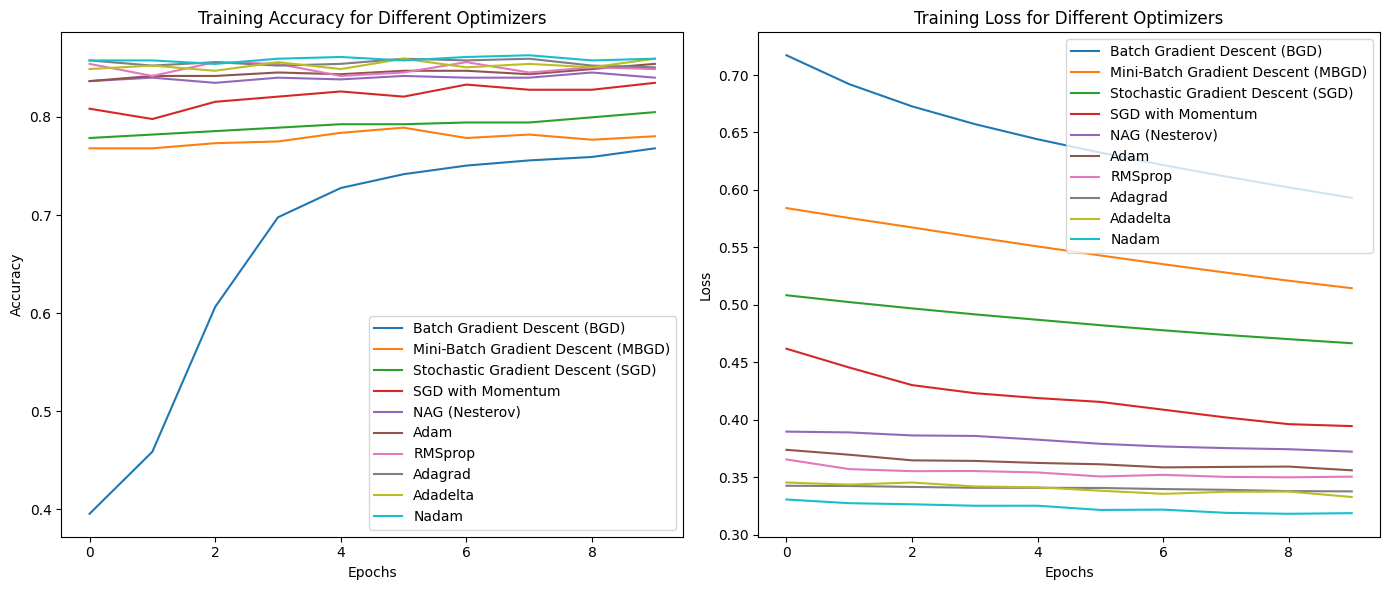

In [12]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Load Titanic dataset
file_path = "titanic.csv"  # Change this to your actual path
data = pd.read_csv(file_path)

# Preprocess the data
data = data.drop(['Name', 'Ticket', 'Cabin'], axis=1)
data['Age'] = data['Age'].fillna(data['Age'].median())
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])
data['Fare'] = data['Fare'].fillna(data['Fare'].median())

# Encode categorical variables
data['Sex'] = LabelEncoder().fit_transform(data['Sex'])
data = pd.get_dummies(data, columns=['Embarked'])  # One-hot encoding

# Split dataset into features and target
X = data.drop('Survived', axis=1)
y = data['Survived']  # Binary labels (0 or 1)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define MLP model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Binary classification (sigmoid activation)
])

# Define optimizers
optimizers = {
    "Batch Gradient Descent (BGD)": tf.keras.optimizers.SGD(learning_rate=0.01),
    "Mini-Batch Gradient Descent (MBGD)": tf.keras.optimizers.SGD(learning_rate=0.01),
    "Stochastic Gradient Descent (SGD)": tf.keras.optimizers.SGD(learning_rate=0.01),
    "SGD with Momentum": tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
    "NAG (Nesterov)": tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=True),
    "Adam": tf.keras.optimizers.Adam(learning_rate=0.001),
    "RMSprop": tf.keras.optimizers.RMSprop(learning_rate=0.001),
    "Adagrad": tf.keras.optimizers.Adagrad(learning_rate=0.01),
    "Adadelta": tf.keras.optimizers.Adadelta(learning_rate=1.0),
    "Nadam": tf.keras.optimizers.Nadam(learning_rate=0.001)
}

all_acc = {}
all_loss = {}

# Train and evaluate model for different optimizers
for name, opt in optimizers.items():
    print(f"\nTraining with optimizer: {name}")
    
    # Compile model with correct loss function
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

    # Train model (increase epochs to see more results)
    history = model.fit(X_train, y_train, epochs=10, verbose=1, validation_split=0.2)

    # Predict on test set
    y_pred = (model.predict(X_test) > 0.5).astype("int32")

    # Print classification report
    print(f"\n{name} - Classification Report:")
    print(classification_report(y_test, y_pred))

    # Store accuracy and loss for plotting
    all_acc[name] = history.history['accuracy']
    all_loss[name] = history.history['loss']

# Plot loss and accuracy for all optimizers
plt.figure(figsize=(14, 6))

# Plot Accuracy
plt.subplot(1, 2, 1)
for name, acc in all_acc.items():
    plt.plot(acc, label=name)
plt.title('Training Accuracy for Different Optimizers')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
for name, loss in all_loss.items():
    plt.plot(loss, label=name)
plt.title('Training Loss for Different Optimizers')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


Training with optimizer: SGD


c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step

Epoch 3 (SGD) Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.92      0.83       105
           1       0.84      0.58      0.69        74

    accuracy                           0.78       179
   macro avg       0.80      0.75      0.76       179
weighted avg       0.79      0.78      0.77       179

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 

Epoch 5 (SGD) Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.92      0.83       105
           1       0.84      0.58      0.69        74

    accuracy                           0.78       179
   macro avg       0.80      0.75      0.76       179
weighted avg       0.79      0.78      0.77       179

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

Epoch 7 (SGD) Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.92      0.83       105
         

c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step

Epoch 3 (Momentum) Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       105
           1       0.80      0.72      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 

Epoch 5 (Momentum) Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       105
           1       0.80      0.72      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  

Epoch 7 (Momentum) Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.88      0.84     

c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step

Epoch 3 (NAG) Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       105
           1       0.81      0.70      0.75        74

    accuracy                           0.81       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.81      0.81      0.81       179

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 

Epoch 5 (NAG) Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       105
           1       0.81      0.70      0.75        74

    accuracy                           0.81       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.81      0.81      0.81       179

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

Epoch 7 (NAG) Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       105
         

c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step

Epoch 3 (Adam) Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.90      0.86       105
           1       0.84      0.70      0.76        74

    accuracy                           0.82       179
   macro avg       0.83      0.80      0.81       179
weighted avg       0.82      0.82      0.82       179

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 604us/step

Epoch 5 (Adam) Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.90      0.86       105
           1       0.84      0.70      0.76        74

    accuracy                           0.82       179
   macro avg       0.83      0.80      0.81       179
weighted avg       0.82      0.82      0.82       179

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 

Epoch 7 (Adam) Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.90      0.86       105
     

c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step

Epoch 3 (RMSprop) Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       105
           1       0.80      0.72      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 

Epoch 5 (RMSprop) Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       105
           1       0.80      0.72      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 

Epoch 7 (RMSprop) Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       1

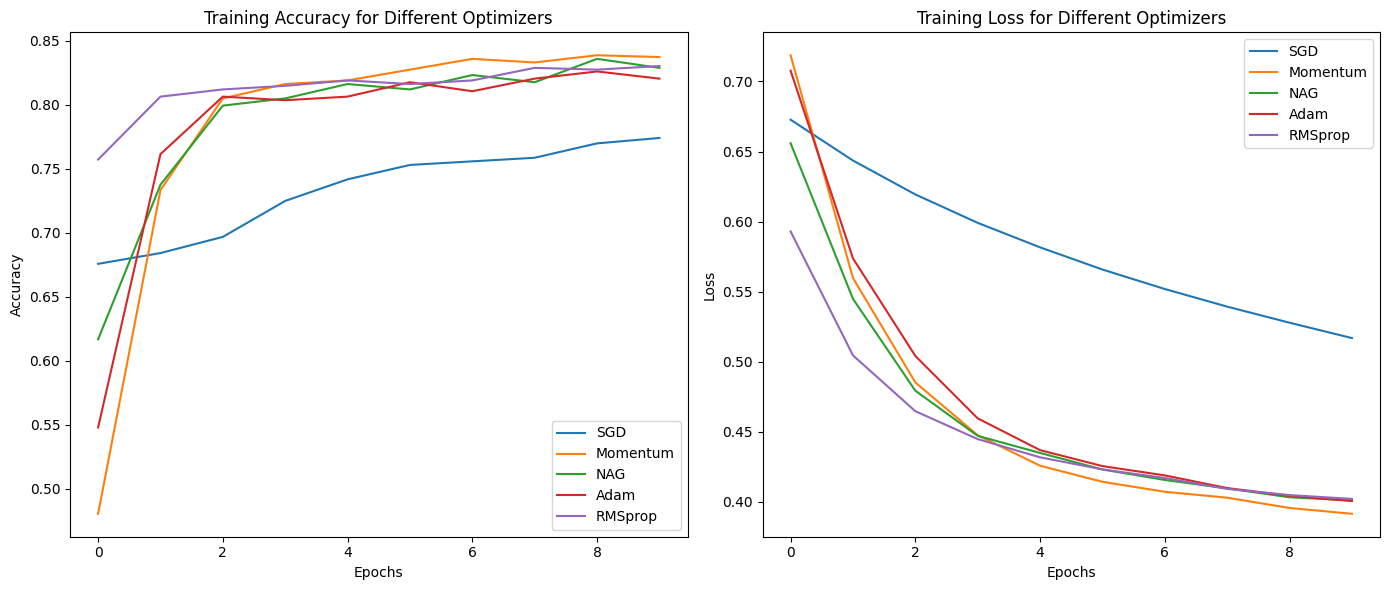


Final Results:
SGD - Final Validation Accuracy: 0.7739, Final Validation Loss: 0.5169
Momentum - Final Validation Accuracy: 0.8371, Final Validation Loss: 0.3915
NAG - Final Validation Accuracy: 0.8287, Final Validation Loss: 0.4010
Adam - Final Validation Accuracy: 0.8202, Final Validation Loss: 0.4006
RMSprop - Final Validation Accuracy: 0.8301, Final Validation Loss: 0.4021


In [13]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report
import time
import matplotlib.pyplot as plt

# Load data
file_path = "titanic.csv"  # Change to your actual file path
data = pd.read_csv(file_path)
data.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
data.fillna({'Age': data['Age'].median(), 'Embarked': data['Embarked'].mode()[0], 'Fare': data['Fare'].median()}, inplace=True)
data['Sex'] = LabelEncoder().fit_transform(data['Sex'])
data = pd.get_dummies(data, columns=['Embarked'])
X, y = data.drop('Survived', axis=1), data['Survived']

# Split and scale data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train, X_test = scaler.fit_transform(X_train), scaler.transform(X_test)

# Define optimizers
optimizers = {
    "Batch Gradient Descent (BGD)": tf.keras.optimizers.SGD(learning_rate=0.01),
    "Mini-Batch Gradient Descent (MBGD)": tf.keras.optimizers.SGD(learning_rate=0.01),
    "Stochastic Gradient Descent (SGD)": tf.keras.optimizers.SGD(learning_rate=0.01),
    "SGD with Momentum": tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
    "NAG (Nesterov)": tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=True),
    "Adam": tf.keras.optimizers.Adam(learning_rate=0.001),
    "RMSprop": tf.keras.optimizers.RMSprop(learning_rate=0.001),
    "Adagrad": tf.keras.optimizers.Adagrad(learning_rate=0.01),
    "Adadelta": tf.keras.optimizers.Adadelta(learning_rate=1.0),
    "Nadam": tf.keras.optimizers.Nadam(learning_rate=0.001)
}


target_epochs = [3, 5, 7]
all_acc, all_loss = {}, {}

for name, opt in optimizers.items():
    print(f"Training with optimizer: {name}")
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    
    history = model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0, validation_data=(X_test, y_test))
    all_acc[name], all_loss[name] = history.history['accuracy'], history.history['loss']
    
    for epoch in target_epochs:
        y_pred = (model.predict(X_test) > 0.5).astype("int32")
        print(f"\nEpoch {epoch} ({name}) Classification Report:")
        print(classification_report(y_test, y_pred))

# Plot loss and accuracy for all optimizers
plt.figure(figsize=(14, 6))

# Plot Accuracy
plt.subplot(1, 2, 1)
for name, acc in all_acc.items():
    plt.plot(acc, label=name)
plt.title('Training Accuracy for Different Optimizers')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
for name, loss in all_loss.items():
    plt.plot(loss, label=name)
plt.title('Training Loss for Different Optimizers')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()
 
# Print final results summary
print("\nFinal Results:")
for method in optimizers.keys():
    print(f"{method} - Final Validation Accuracy: {all_acc[method][-1]:.4f}, Final Validation Loss: {all_loss[method][-1]:.4f}")